<a href="https://colab.research.google.com/github/GAKIZAB/Time_series/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis**

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima import auto_arima

# Step 1: Load the dataset and parse dates

In [42]:
# Data Loading
data = pd.read_csv('dataset.txt', parse_dates=['date'], index_col='date')
print(data.head())

               value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869


In [43]:
# Display the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


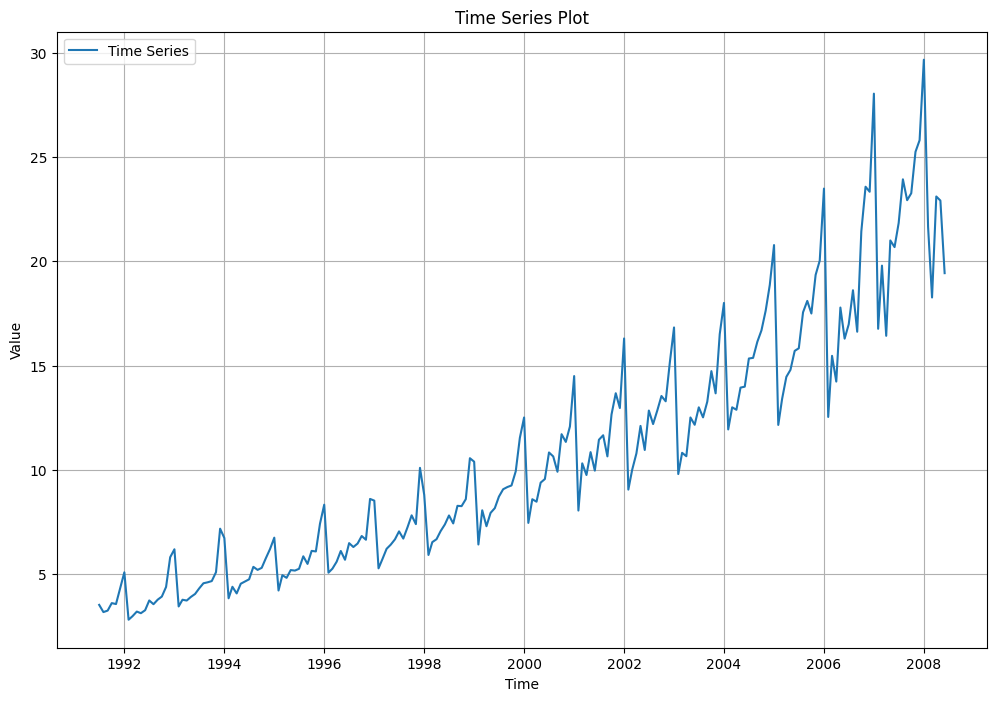

In [44]:
# Time Series Visualization
plt.figure(figsize=(12, 8))
plt.plot(data['value'], label='Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.grid(True)
plt.legend()
plt.show()

# Step 2: Stationarity Test (ADF Test)

In [45]:
# Apply the Augmented Dickey-Fuller test to check if the time series is stationary
result = adfuller(data['value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 3.14518568930673
p-value: 1.0


# Step 3: Function to perform the ADF test and determine the number of differences needed

In [ ]:
# Determining Differencing Required
def test_adf(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1]

def determine_differencing(series, max_diff=3):
    diff_count = 0
    while diff_count < max_diff:
        p_value = test_adf(series)
        if p_value < 0.05:  # If p-value < 0.05, the series is stationary
            print(f"The series is stationary after {diff_count} differencing.")
            return diff_count
        series = series.diff().dropna()
        diff_count += 1
    print("The series is still not stationary after maximum differencing.")
    return diff_count

In [46]:
# Apply the differencing determination function
series = data['value']
differencing_needed = determine_differencing(series)
print(f'Differencing Needed: {differencing_needed}')

ADF Statistic: 3.14518568930673
p-value: 1.0
ADF Statistic: -2.4951721474497393
p-value: 0.11665341686468789
ADF Statistic: -10.29230470651732
p-value: 3.543916358529341e-18
La série est stationnaire après 2 différenciations.
Differencing Needed: 2


# Step 4: Plot Original and Differenced Series

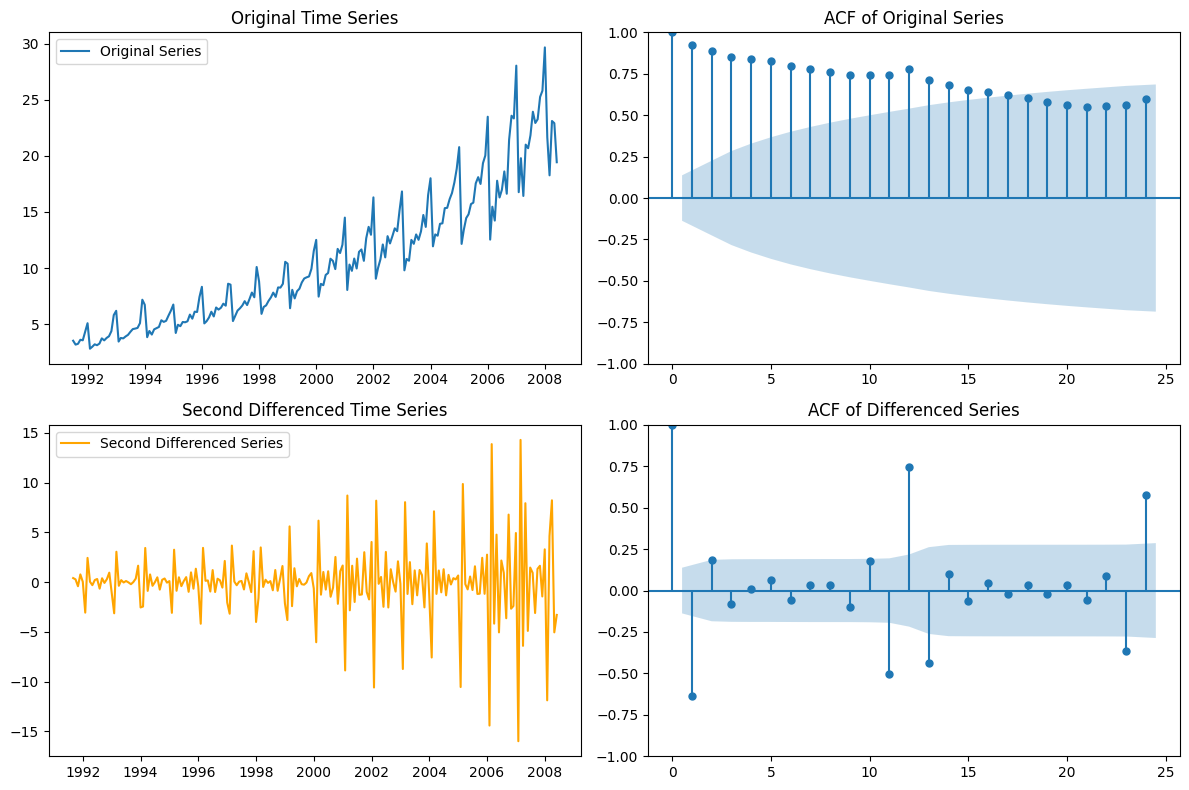

In [51]:
# Plot the original series and its differenced versions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original Time Series
axes[0, 0].plot(series, label='Original Series')
axes[0, 0].set_title('Original Time Series')
axes[0, 0].legend()

# ACF of Original Time Series
plot_acf(series, ax=axes[0, 1])
axes[0, 1].set_title('ACF of Original Series')

# Differenced Series
series_diff = series.diff().diff().dropna()
axes[1, 0].plot(series_diff, label='Second Differenced Series', color='orange')
axes[1, 0].set_title('Second Differenced Time Series')
axes[1, 0].legend()

# ACF of Differenced Series
plot_acf(series_diff, ax=axes[1, 1])
axes[1, 1].set_title('ACF of Differenced Series')

plt.tight_layout()
plt.show()

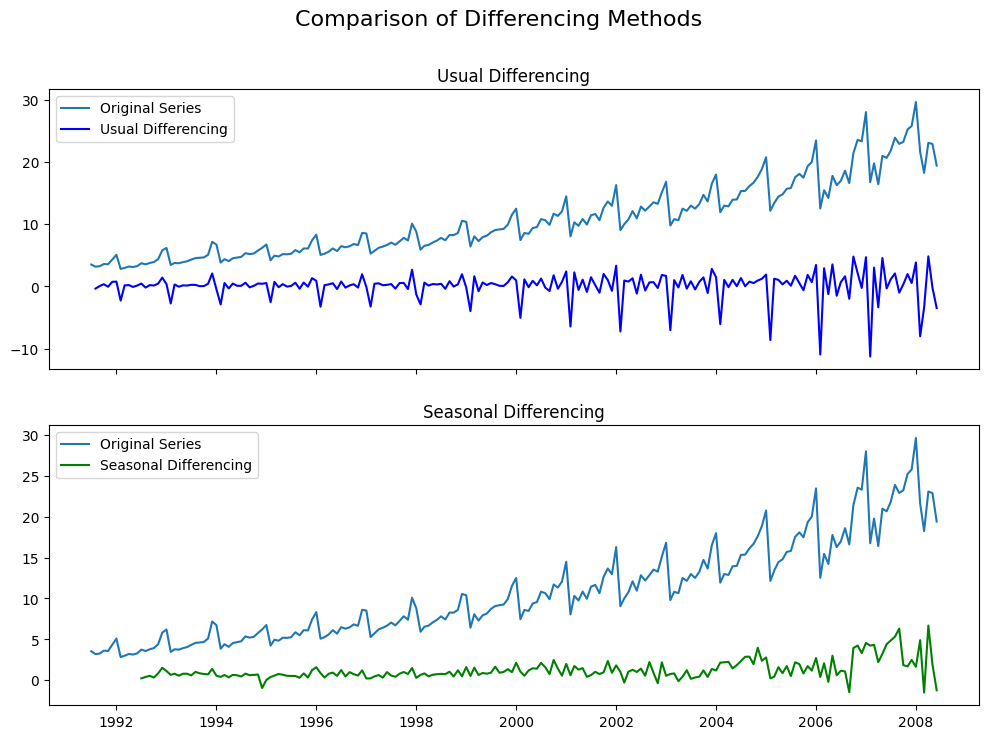

In [52]:
# Seasonal and Non-Seasonal Differencing Comparison
fig, axes = plt.subplots(2, 1, figsize=(12, 8), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(series, label='Original Series')
axes[0].plot(series.diff(1), label='Usual Differencing', color='blue')
axes[0].set_title('Usual Differencing')
axes[0].legend()

# Seasonal Differencing
axes[1].plot(series, label='Original Series')
axes[1].plot(series.diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
axes[1].legend()

plt.suptitle('Comparison of Differencing Methods', fontsize=16)
plt.show()

# Step 5: **SARIMA** Model

In [53]:
# Use auto_arima to determine the best model parameters
model = auto_arima(series, start_p=1, start_q=1, test='adf', max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True, d=None, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)

# Print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=3.45 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.40 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.28 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=3.11 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=1.08 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.743, Time=7.15 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.33 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.57 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.32 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=3.43 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

# Step 6: Model Diagnostics

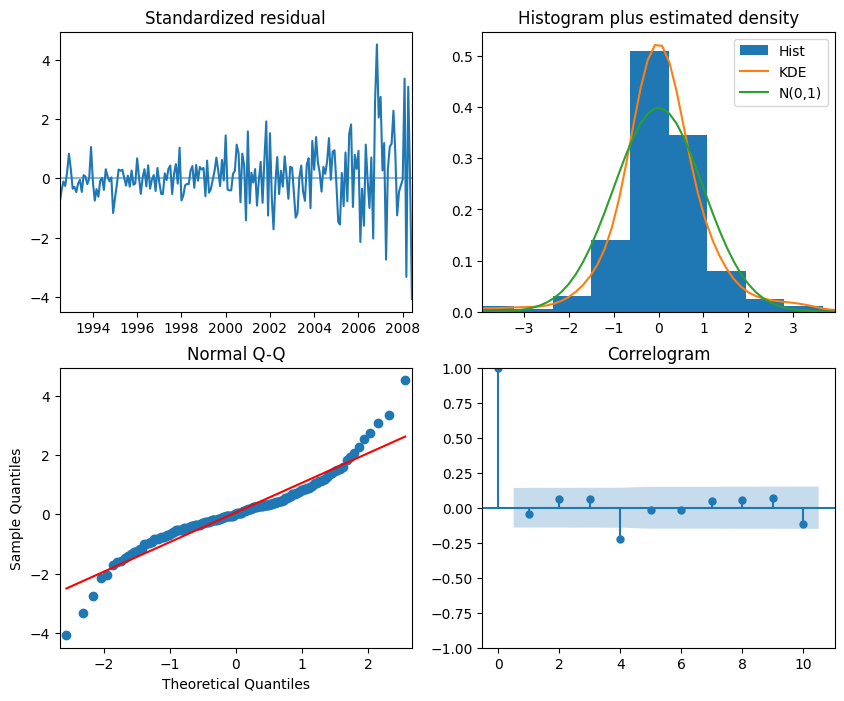

In [54]:
# Plot diagnostic plots for the ARIMA model
model.plot_diagnostics(figsize=(10, 8))
plt.show()

# Step 7: Model Prediction

In [55]:
# Make predictions for the next 12 periods
fitted, confint = model.predict(n_periods=12, return_conf_int=True)

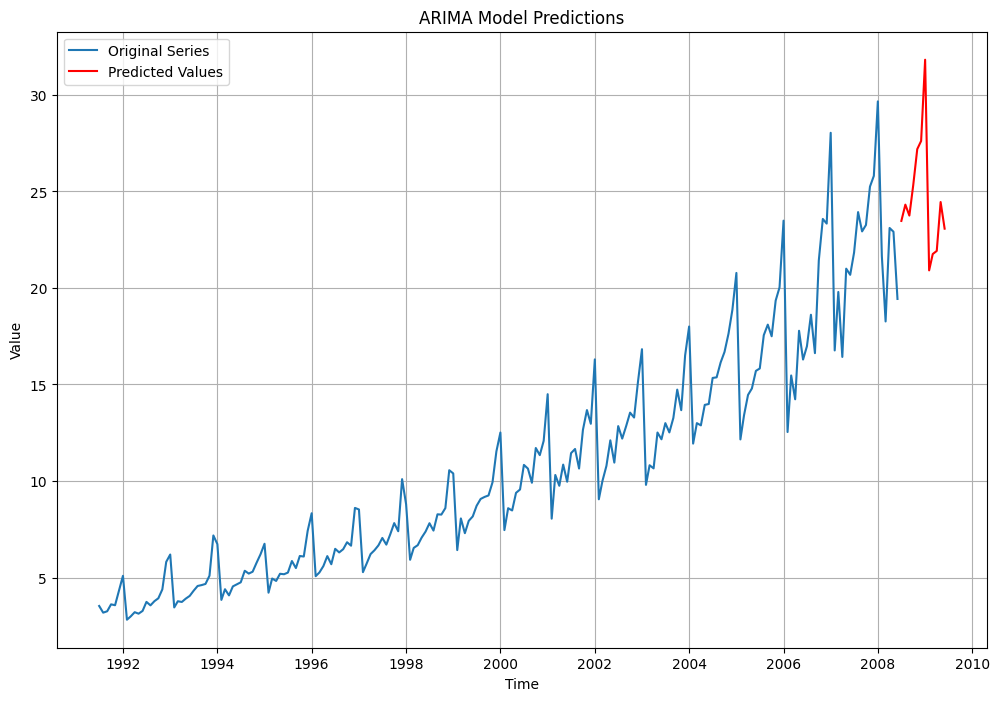

In [60]:
# Visualize the predictions
plt.figure(figsize=(12, 8))
plt.plot(series, label='Original Series')
plt.plot(fitted, label='Predicted Values', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.show()

# Step 8 : **LSTM**